In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [129]:
df = pd.read_csv("/kaggle/input/heart-disease-uci/heart.csv")

In [130]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

COLUMNS VALUE REPRESENTING:
* 1: age
* 2: sex(1 = male, 0 = female)
* 3: chest pain type (4 values)
* 4: resting blood pressure
* 5: serum cholestoral in mg/dl
* 6: fasting blood sugar > 120 mg/dl
* 7: resting electrocardiographic results (values 0,1,2)
* 8: maximum heart rate achieved
* 9: exercise induced angina
* 10: oldpeak = ST depression induced by exercise relative to rest
* 11: the slope of the peak exercise ST segment
* 12: number of major vessels (0-3) colored by flourosopy
* 13: thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [131]:
#CHCEKING VALUT TYPE AND NOT-NULL VALUES
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [132]:
# CHECKING MEAN STANDARD DEVIATION AND OTHER INFORMATIONS FOR COLUMNS
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

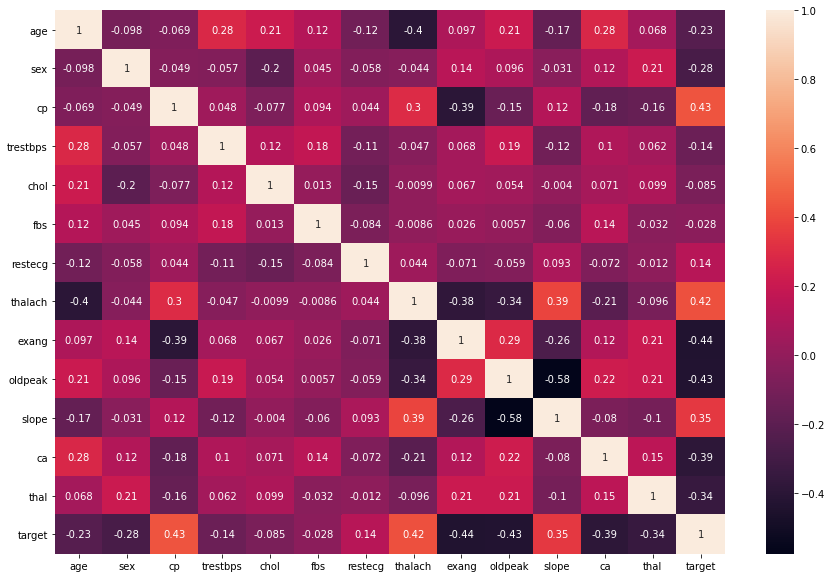

In [133]:
#CHECK COVARIANCE RELATION BETWEEN COLUMNS 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,10))
#df.corr()
sns.heatmap(df.corr(),annot = True,linecolor = "RED")
plt.show()

FROM THIS CORRELATION GRAPH WE CAN SEE IT IS SHOWING GOOD CORRELATION BETWEEN TARGET AND CHEST PAIN AND TARGET AND THALACH

NOW LETS CHECK HOW HEART DISEASE DEPENDS ON AGE. AS FAR ON OUR GOOGLE KNOWLEDGE WE ASSUME THAT OLD AGES ARE MORE PRONE
TO GET HEART DISEASE.

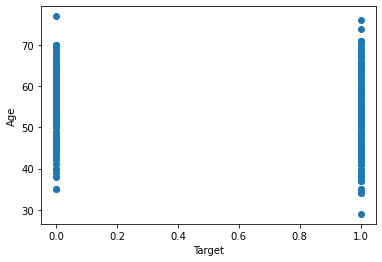

In [134]:
plt.scatter(df['target'],df['age'])
plt.xlabel("Target")
plt.ylabel("Age")
plt.show()

As 0 represent no heart disease and 1 represent heart disease. And by the upper graph it seems all the age group are having 
heart disease patients.
Lets plot distribution plot to see how many patients falls in which age groups.

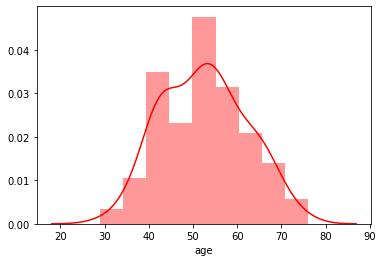

In [135]:
# Filtering patients
patients = df[df['target'] == 1]
sns.distplot(patients['age'],color = "RED")

Age group 50-60 having more patients than any other age groups.

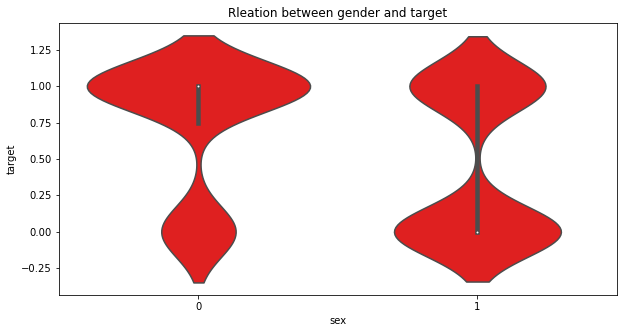

In [136]:
plt.figure(figsize = (10,5))
sns.violinplot( df["sex"] ,df["target"], color="RED")
plt.title("Rleation between gender and target")
plt.show()
#sns.distplot( df["target"] , color="red")
#sns.plt.legend()
#plt.scatter(df['sex'],df['target'])


As 0 shows female on x axis and 1 shows heart disease on y axis, and it is visible that there are high probability distribution for female means more female patient probability. Lets confirm it manually.

In [137]:
print(df['sex'].value_counts())
female = df[df['sex'] == 0]
female_patients = female[female['target'] == 1]
male = df[df['sex'] == 1]
male_patients = male[male['target'] == 1]
print("Probability for women having heart disease" + str(len(female_patients)/len(female)))
print("Probability for men having heart disease" + str(len(male_patients)/len(male)))

1    207
0     96
Name: sex, dtype: int64
Probability for women having heart disease0.75
Probability for men having heart disease0.4492753623188406


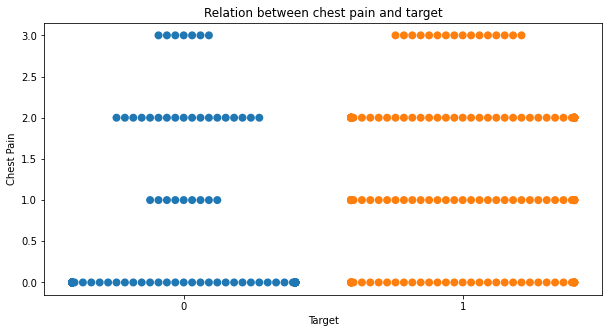

In [138]:
plt.figure(figsize = (10,5))
sns.swarmplot(df['target'],df['cp'], size = 8)
plt.xlabel("Target")
plt.ylabel("Chest Pain")
plt.title("Relation between chest pain and target")
plt.show()

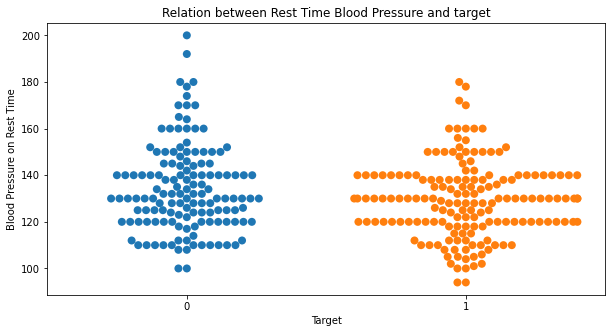

In [139]:
plt.figure(figsize = (10,5))
sns.swarmplot(df['target'],df['trestbps'], size = 8)
plt.xlabel("Target")
plt.ylabel("Blood Pressure on Rest Time")
plt.title("Relation between Rest Time Blood Pressure and target")
plt.show()

RELATION BETWEEN A PERSON'S CHOLESTROL AND HEART DISEASE.

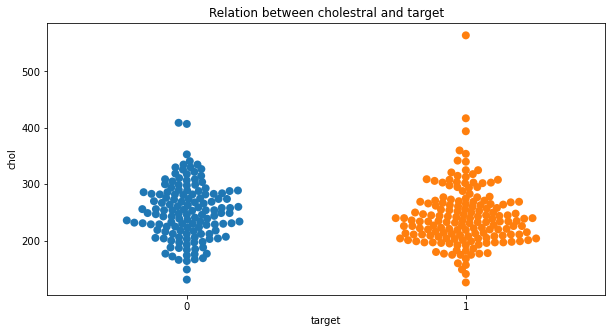

In [140]:
plt.figure(figsize = (10,5))
sns.swarmplot(df['target'],df['chol'], size = 8)
plt.title("Relation between cholestral and target")
plt.show()

This function is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap. This gives a better representation of the distribution of values, but it does not scale well to large numbers of observations. This style of plot is sometimes called a “beeswarm”.

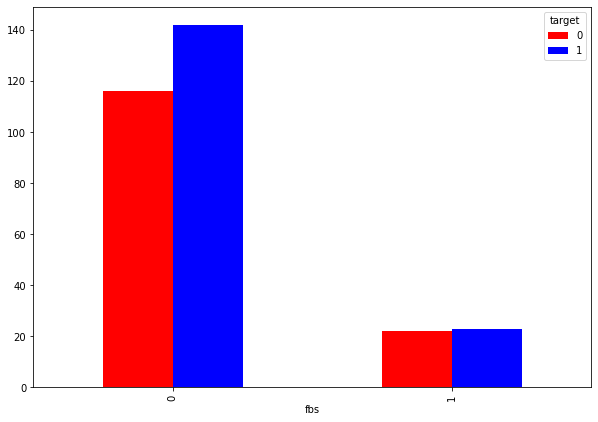

In [141]:
pd.crosstab(df['fbs'],df['target']).plot(kind="bar",figsize=(10,7),color=['RED','BLUE' ])
#plt.xlabel('Target')
#plt.ylabel('Frequency of Disease or Not')
plt.show()

In [142]:
pd.crosstab(df['fbs'],df['target'])

target    0    1
fbs             
0       116  142
1        22   23

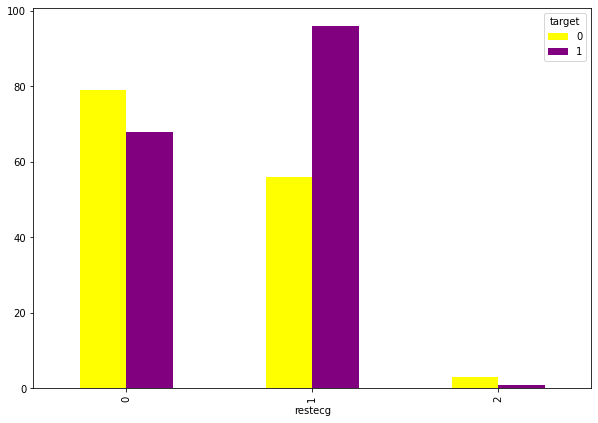

In [143]:
pd.crosstab(df['restecg'],df['target']).plot(kind="bar",figsize=(10,7),color=['yellow','purple' ])
#plt.xlabel("")


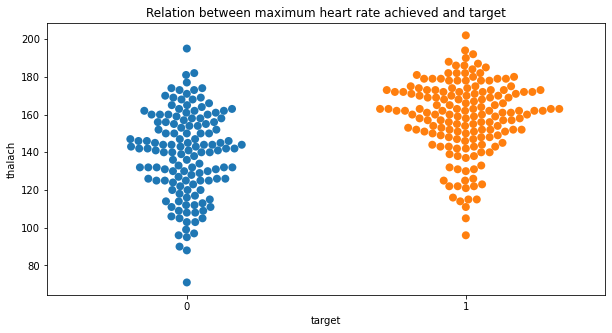

In [144]:
plt.figure(figsize = (10,5))
sns.swarmplot(df['target'],df['thalach'], size = 8)
plt.title("Relation between maximum heart rate achieved and target")
plt.show()

ACCORDING TO UCI REPOSITORY INFORMATION

categorical variable = 'sex','chest_pain_type','fasting_blood_sugar','rest_ecg','exercise_induced_angina','st_slope','num_major_vessels','thalassemia','target'
numerical variable = 'age','resting_blood_pressure','cholesterol','max_heart_rate_achieved','st_depression','target' Because they are categorial values but represent in int modle is not able to work fairly, So changing it in dummie variables.

In [145]:

X = df[['sex','cp','fbs','restecg','exang','slope','ca','thal']].astype(object)
dummies = pd.get_dummies(X)
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   sex_0      303 non-null    uint8
 1   sex_1      303 non-null    uint8
 2   cp_0       303 non-null    uint8
 3   cp_1       303 non-null    uint8
 4   cp_2       303 non-null    uint8
 5   cp_3       303 non-null    uint8
 6   fbs_0      303 non-null    uint8
 7   fbs_1      303 non-null    uint8
 8   restecg_0  303 non-null    uint8
 9   restecg_1  303 non-null    uint8
 10  restecg_2  303 non-null    uint8
 11  exang_0    303 non-null    uint8
 12  exang_1    303 non-null    uint8
 13  slope_0    303 non-null    uint8
 14  slope_1    303 non-null    uint8
 15  slope_2    303 non-null    uint8
 16  ca_0       303 non-null    uint8
 17  ca_1       303 non-null    uint8
 18  ca_2       303 non-null    uint8
 19  ca_3       303 non-null    uint8
 20  ca_4       303 non-null    uint8
 21  thal_0     303 n

In [146]:
df.drop(['sex','cp','fbs','restecg','exang','slope','ca','thal'], inplace = True,axis = 1)

In [147]:
df = pd.concat([df,dummies] ,axis = 1)

In [148]:
df

age  trestbps  chol  thalach  oldpeak  target  sex_0  sex_1  cp_0  cp_1  \
0     63       145   233      150      2.3       1      0      1     0     0   
1     37       130   250      187      3.5       1      0      1     0     0   
2     41       130   204      172      1.4       1      1      0     0     1   
3     56       120   236      178      0.8       1      0      1     0     1   
4     57       120   354      163      0.6       1      1      0     1     0   
..   ...       ...   ...      ...      ...     ...    ...    ...   ...   ...   
298   57       140   241      123      0.2       0      1      0     1     0   
299   45       110   264      132      1.2       0      0      1     0     0   
300   68       144   193      141      3.4       0      0      1     1     0   
301   57       130   131      115      1.2       0      0      1     1     0   
302   57       130   236      174      0.0       0      1      0     0     1   

     ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  \
0    ...        0     1     0     0     0     0       0       1       0   
1    ...        0     1     0     0     0     0       0       0       1   
2    ...        1     1     0     0     0     0       0       0       1   
3    ...        1     1     0     0     0     0       0       0       1   
4    ...        1     1     0     0     0     0       0       0       1   
..   ...      ...   ...   ...   ...   ...   ...     ...     ...     ...   
298  ...        0     1     0     0     0     0       0       0       0   
299  ...        0     1     0     0     0     0       0       0       0   
300  ...        0     0     0     1     0     0       0       0       0   
301  ...        0     0     1     0     0     0       0       0       0   
302  ...        0     0     1     0     0     0       0       0       1   

     thal_3  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
298       1  
299       1  
300       1  
301       1  
302       0  

[303 rows x 31 columns]

In [152]:
#CHANGING NUMERICAL VALUES TO THEIR STANDARD VALUE
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
nm = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[nm] = scale.fit_transform(df[nm])

In [153]:
df

age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0    0.952197  0.763956 -0.256334  0.015443  1.087338       1      0      1   
1   -1.915313 -0.092738  0.072199  1.633471  2.122573       1      0      1   
2   -1.474158 -0.092738 -0.816773  0.977514  0.310912       1      1      0   
3    0.180175 -0.663867 -0.198357  1.239897 -0.206705       1      0      1   
4    0.290464 -0.663867  2.082050  0.583939 -0.379244       1      1      0   
..        ...       ...       ...       ...       ...     ...    ...    ...   
298  0.290464  0.478391 -0.101730 -1.165281 -0.724323       0      1      0   
299 -1.033002 -1.234996  0.342756 -0.771706  0.138373       0      0      1   
300  1.503641  0.706843 -1.029353 -0.378132  2.036303       0      0      1   
301  0.290464 -0.092738 -2.227533 -1.515125  0.138373       0      0      1   
302  0.290464 -0.092738 -0.198357  1.064975 -0.896862       0      1      0   

     cp_0  cp_1  ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  \
0       0     0  ...        0     1     0     0     0     0       0       1   
1       0     0  ...        0     1     0     0     0     0       0       0   
2       0     1  ...        1     1     0     0     0     0       0       0   
3       0     1  ...        1     1     0     0     0     0       0       0   
4       1     0  ...        1     1     0     0     0     0       0       0   
..    ...   ...  ...      ...   ...   ...   ...   ...   ...     ...     ...   
298     1     0  ...        0     1     0     0     0     0       0       0   
299     0     0  ...        0     1     0     0     0     0       0       0   
300     1     0  ...        0     0     0     1     0     0       0       0   
301     1     0  ...        0     0     1     0     0     0       0       0   
302     0     1  ...        0     0     1     0     0     0       0       0   

     thal_2  thal_3  
0         0       0  
1         1       0  
2         1       0  
3         1       0  
4         1       0  
..      ...     ...  
298       0       1  
299       0       1  
300       0       1  
301       0       1  
302       1       0  

[303 rows x 31 columns]

In [154]:
df.shape

(303, 31)

In [155]:
from sklearn.model_selection import train_test_split
y = df.target
df.drop('target',inplace = True,axis = 1)
print(y.shape)
print(df.shape)
x_train, x_test, y_train, y_test = train_test_split(df,y,test_size = 0.2,random_state=0)

(303,)
(303, 30)


In [156]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
train_acc = accuracy_score(y_train,lr.predict(x_train))
acc = accuracy_score(y_test,pred)
print("Training_Accuracy" + str(train_acc))
print("Test_Accuracy" + str(acc))

Training_Accuracy0.859504132231405
Test_Accuracy0.8852459016393442


In [157]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
pred1 = nb.predict(x_test)
acc1 = accuracy_score(y_test,pred1)
train_acc1 = accuracy_score(y_train,nb.predict(x_train))
print("Training_Accuracy" + str(train_acc1))
print("Test_Accuracy" + str(acc1))

Training_Accuracy0.8429752066115702
Test_Accuracy0.8524590163934426


In [158]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
pred2 = svm.predict(x_test)
acc2 = accuracy_score(y_test,pred2)
acc2

0.8852459016393442

STANDARD SCALING IS EFFECTING SVC ACCURACY AND IT INCREASES.

Try some hyperparameter tuning and see its effect on accuracy.

In [159]:
params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}


grid_search_cv = GridSearchCV(lr, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5, iid=True)
grid_search_cv.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


GridSearchCV(cv=5, estimator=LogisticRegression(), iid=True, n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [160]:
grid_search_cv.best_estimator_

LogisticRegression(C=0.08858667904100823, solver='liblinear')

In [161]:
log_reg = LogisticRegression(C=0.23357214690901212, 
                             solver='liblinear')

log_reg.fit(x_train, y_train)


LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [162]:
pred5 = log_reg.predict(x_test)
acc5 = accuracy_score(y_test,pred5)
acc5

0.8852459016393442

In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        27
           1       0.89      0.91      0.90        34

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.88        61



In [164]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,pred5)

In [165]:
cm

array([[23,  4],
       [ 3, 31]])

In [183]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,random_state = 42)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
print(accuracy_score(y_test,rf_pred))

0.8852459016393442


In [191]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [194]:
param_dist = {"max_depth": [3, None],"max_features": sp_randint(1, x_train.shape[1]),"min_samples_split": sp_randint(2, 11),"bootstrap": [True, False],"n_estimators": sp_randint(100, 500)}

In [195]:
random_search = RandomizedSearchCV(rf, param_distributions=param_dist,
                                   n_iter=10, cv=5, iid=False, random_state=42)
random_search.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_estimators=1000,
                                                    random_state=42),
                   iid=False,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f02480f4b50>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f02480f40d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f02480f41d0>},
                   random_state=42)

In [196]:
print(random_search.best_params_)

{'bootstrap': False, 'max_depth': None, 'max_features': 3, 'min_samples_split': 7, 'n_estimators': 408}


In [198]:
rf1 = RandomForestClassifier(bootstrap = False, max_depth = None, max_features = 3, min_samples_split = 7,n_estimators = 408)
rf1.fit(x_train,y_train)
rf1_pred = rf1.predict(x_test)
print(accuracy_score(y_test,rf1_pred))

0.8688524590163934


**CONCLUSION**
* When we are changing catogorical values with function get dummies then it help us to increase accuracy, and after standerising our numeric variable SVC algorithm is working better than earlier.As Logistic Regression is showing best accuracy for this accuracy because it is a decision making problem.